In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

In [4]:
data = np.array([[3,4], [2,8], [6,9], [10,12]])

In [6]:
df = pd.DataFrame(data=data, columns=["math", "bio"])

In [7]:
df

,math,bio
0,3,4
1,2,8
2,6,9
3,10,12


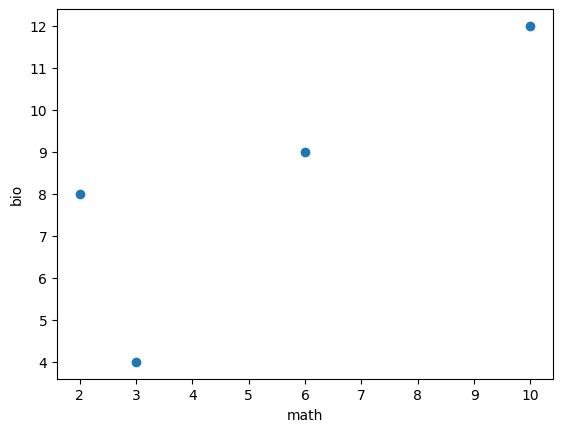

In [9]:
plt.scatter(df['math'], df['bio'])
plt.xlabel('math')
plt.ylabel('bio')
plt.show()

# steps for principle component ananlysis
1. standardization
2. find covariance matrix
3. find eigan value and eigan vector
4. principle component

# manual standardization(note** we can do the same using scikit learn)

In [11]:
df

,math,bio
0,3,4
1,2,8
2,6,9
3,10,12


In [16]:
mean_math = np.mean(df['math'])

In [17]:
mean_bio = np.mean(df['bio'])

In [20]:
meanbycol = np.mean(df,axis=0)

In [21]:
meanbycol

math    5.25
bio     8.25
dtype: float64

SND = (x-mean)/std

In [23]:
deviation = df-meanbycol

In [24]:
std = np.std(deviation,axis=0)

In [26]:
scaled_data = deviation/std

In [30]:
scaled_data

,math,bio
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


same can be done using the sklearn 

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [31]:
scaled_data = scaler.fit_transform(df)

2. find covariance of data(note** we need to provide the transpose of scaled data to cov method )

In [35]:
covariance_matrix  = np.cov(scaled_data.T)

3. Find the eigan value and the eigan vector

In [37]:
eigan_value, eigan_vector = eig(covariance_matrix)

4. find the principle component that is transform the data

note** dot product of transpose of eigan vector and the transpose of scaled_data

In [40]:
eigan_vector.T.dot(scaled_data.T).T

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

same can be done using the pca library in sklearn

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA()

In [43]:
pca.fit_transform(scaled_data)

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [45]:
pca_data = pd.DataFrame(pca.fit_transform(scaled_data), columns=["pca1", "pca2"])

In [46]:
pca.explained_variance_ratio_

array([0.90352119, 0.09647881])

pca1 is 90% of the entire data and pca2 is 10% of entire data so if we need only one feature then we can select pca1